# Dimensionality Reduction using SVD and PCA



In [ ]:
# for conversion to PDF use these settings
%matplotlib inline
# qr_setting = 'url'
# qrviz_setting = 'show'
#
# for lecture use notebook
#%matplotlib notebook
qr_setting = None
qrviz_setting = 'save'
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
# import laUtilities as ut
# import slideUtilities as sl
# import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
# reload(sl)
# reload(ut);

What this means is that if, beyond some $k$, all of the singular values are small, then __$A$ can be closely approximated by a rank-$k$ matrix.__   

A more complex form of dimensionality reduction is performed by **Singular Value Decomposition (SVD)**, which can transform
**any** matrix into three matrices, with the eigenvectors in the first and third, and the eigenvalues in the second. 
    

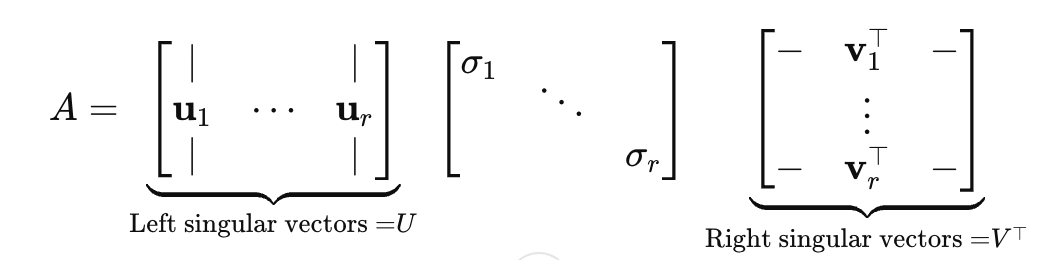

- The **eigenvectors used by PCA are on the right in $V_T$.** 
- The eigenvectors are given in order:  $\sigma_1 \ge \sigma_2 \ge \ldots \ge \sigma_r$

## Using SVD for Signal Compression

When working with measurement data, ie measurements of real-world objects, we find that data is often  __approximately low-rank.__

In other words, a matrix of measurements can often be well approximated by a low-rank matrix.

Classic examples include 
* measurements of human abilities - eg, psychology
* measurements of human preferences -- eg, movie ratings, social networks
* images, movies, sound recordings
* genomics, biological data
* medical records
* text documents 

For example, here is a photo.

We can think of this as a $512\times 512$ matrix $A$ whose entries are grayscale values (numbers between 0 and 1).

In [ ]:
boat = np.loadtxt('./data/boat.dat')
import matplotlib.cm as cm
plt.figure(figsize=(9,9))
plt.imshow(boat,cmap = cm.Greys_r);

Let's look at the singular values of this matrix.

We compute $A = U\Sigma V^T$ and look at the values on the diagonal of $\Sigma$.

This is often called the matrix's "spectrum".

In [ ]:
u, s, vt = np.linalg.svd(boat, full_matrices=False)
plt.figure(figsize=(9,6))
plt.plot(s, lw=3)
plt.ylabel(r'Magnitude of $\sigma_k$', size=20)
plt.xlabel(r'$k$', size=24); 

What is this telling us?   

Most of the singular values of $A$ are quite small. 

Only the first few singular values are large -- up to, say, $k$ = 40.

Remember that the error we get when we use a rank-$k$ approximation is

$$\sqrt{\sum_{i=k+1}^r\sigma^2_i}.$$

So we can use the singular values of $A$ to compute the relative error over a range of possible approximations $A^{(k)}$.

In [ ]:
fig = plt.figure(figsize=(9,6))
Anorm = np.linalg.norm(boat)
err = np.cumsum(s[::-1]**2)
err = np.sqrt(err[::-1])
plt.plot(range(1,41), err[:40]/Anorm, lw=3)
plt.xlim([0,40])
plt.ylim([0,1])
plt.xlabel(r'$k$', size=20)
plt.title(r'Relative Error of rank-$k$ approximation to $A$', size=20); 

This matrix $A$ has rank of 512.   

But the error when we approximate $A$ by a rank 40 matrix is only around 10\%.

We say that the __effective__ rank of $A$ is low (perhaps 40).

Let's find the closest rank-40 matrix to $A$ and view it.

We can do this quite easily using the SVD.   

We simply construct our approximation of $A$ using only the first 40 columns of $U$ and top 40 rows of $V^T$.

In [ ]:
u, s, vt = np.linalg.svd(boat, full_matrices=False)
scopy = s.copy()

In [ ]:
# construct a rank-n version of the boat

rank = 40
scopy[rank:]=0
boatApprox = u @ np.diag(scopy) @ vt
#
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.imshow(boatApprox,cmap = cm.Greys_r)
plt.title('Rank {}'.format(rank), size=20)
plt.subplot(1,2,2)
plt.imshow(boat,cmap = cm.Greys_r)
plt.title('Rank 512', size=20)
plt.subplots_adjust(wspace=0.5);

In [ ]:
rank = 40
scopy[rank:]=0
boatApprox = u @ np.diag(scopy) @ vt
#
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.imshow(boatApprox,cmap = cm.Greys_r)
plt.title('Rank {}'.format(rank), size=20)
plt.subplot(1,2,2)
plt.imshow(boat,cmap = cm.Greys_r)
plt.title('Rank 512', size=20)
plt.subplots_adjust(wspace=0.5);

In [ ]:
rank = 25
scopy[rank:]=0
boatApprox = u @ np.diag(scopy) @ vt
#
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.imshow(boatApprox,cmap = cm.Greys_r)
plt.title('Rank {}'.format(rank), size=20)
plt.subplot(1,2,2)
plt.imshow(boat,cmap = cm.Greys_r)
plt.title('Rank 512', size=20)
plt.subplots_adjust(wspace=0.5);

In [ ]:
rank = 10
scopy[rank:]=0
boatApprox = u @ np.diag(scopy) @ vt
#
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.imshow(boatApprox,cmap = cm.Greys_r)
plt.title('Rank {}'.format(rank), size=20)
plt.subplot(1,2,2)
plt.imshow(boat,cmap = cm.Greys_r)
plt.title('Rank 512', size=20)
plt.subplots_adjust(wspace=0.5);

Note that the rank-40 boat takes up only 40/512 = __8% of the space of the original image!__

This general principle is what makes image, video, and sound compression effective.  

When you 
* watch HDTV, or 
* listen to an MP3, or 
* look at a JPEG image, 

these signals have been compressed using the fact that they are __effectively low-rank__ matrices.

As you can see from the example of the boat image, it is often possible to compress such signals enormously, leading to an immense savings of storage space and transmission bandwidth.


## Principal Components Analysis



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# -------------------------------------------------
# 1. Assume you already have your image as a 2D array A
#    (this might be the same A you used for your SVD demo)
# -------------------------------------------------
# Example: if you instead want to load from file:
# from PIL import Image
# A = np.array(Image.open("your_image.png").convert("L"), dtype=float)

A = boat

A = A.astype(float)
if A.max() > 1.0:
    A = A / 255.0   # normalize to [0,1] if needed

H, W = A.shape
print("Image shape:", A.shape)

# -------------------------------------------------
# 2. Function: compress + reconstruct with k principal components
# -------------------------------------------------
def pca_compress_image(A, k):
    """
    A: (H, W) grayscale image
    k: number of principal components to keep
    returns: reconstructed image with k PCs
    """
    # Treat each row as a sample, columns as features
    X = A  # shape (H, W)
    
    # PCA will automatically center the columns
    pca = PCA(n_components=k)
    X_scores = pca.fit_transform(X)        # shape (H, k)
    X_recon  = pca.inverse_transform(X_scores)  # back to (H, W)
    
    return np.clip(X_recon, 0, 1), pca.explained_variance_ratio_.sum()

# -------------------------------------------------
# 3. Try several values of k
# -------------------------------------------------
k_list = [5, 20, 50, 100]  # choose PCs to show

fig, axes = plt.subplots(1, len(k_list) + 1, figsize=(14, 4))

# Original image
axes[0].imshow(A, cmap="gray")
axes[0].set_title("Original")
axes[0].axis("off")

# Compressed versions
for ax, k in zip(axes[1:], k_list):
    A_k, evr = pca_compress_image(A, k)
    ax.imshow(A_k, cmap="gray")
    ax.set_title(f"{k} PCs\nEVR = {evr:.1%}")
    ax.axis("off")

plt.tight_layout()
plt.show()


## Visualization using PCA

I'll now show an extended example to give you a sense of the power of PCA.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset
np.random.seed(42)
X = np.random.multivariate_normal([0, 0], [[3, 2.5], [2.5, 3]], 75)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 2 components for full-dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply PCA with 1 component for dimensionality reduction to 1D
pca_1d = PCA(n_components=1)
X_pca_1d = pca_1d.fit_transform(X_scaled)

# Project back to 2D space to visualize the 1D reduction
X_projected = pca_1d.inverse_transform(X_pca_1d)

# Plot original data, 1D projection, and principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.7, label="Original Data", color='blue')
plt.scatter(X_projected[:, 0], X_projected[:, 1], alpha=0.7, label="1D Projection", color='red')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("PCA: Reduction to 1 Dimension")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset
np.random.seed(42)
X = np.random.multivariate_normal([0, 0], [[3, 2.5], [2.5, 3]], 100)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 1 component for dimensionality reduction to 1D
pca_1d = PCA(n_components=1)
X_pca_1d = pca_1d.fit_transform(X_scaled)

# Plot the 1D number line
plt.figure(figsize=(10, 2))
plt.axhline(0, color='black', linewidth=0.8)  # Draw the 1D number line
plt.scatter(X_pca_1d, np.zeros_like(X_pca_1d), alpha=0.7, color='red', label="Projected Points")
# for i, x in enumerate(X_pca_1d):
#     plt.text(x, 0.05, str(i), fontsize=8, ha='center')  # Label each point with its index

plt.xlabel("Principal Component 1")
plt.title("1D Number Line Showing Points Projected onto the First Principal Component")
plt.yticks([])  # Remove y-axis ticks
# plt.legend()
plt.grid(True, axis='x')
plt.show()


## Document Analysis

Let's analyze some really high-dimensional data: __documents.__

A common way to represent documents is using the bag-of-words model.

In this matrix, rows are documents, columns are words, and entries count how many time a word appears in a document.  

This is called a _document-term matrix._

$${\mbox{$m$ documents}}\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{ccccc}
\begin{array}{c}a_{11}\\\vdots\\a_{i1}\\\vdots\\a_{m1}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}a_{1j}\\\vdots\\a_{ij}\\\vdots\\a_{mj}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}a_{1n}\\\vdots\\a_{in}\\\vdots\\a_{mn}\end{array}
\end{array}\right]}^{\mbox{$n$ terms}}$$

In [ ]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.os.ms-windows.misc', 'sci.space', 'rec.sport.baseball']
news_data = fetch_20newsgroups(subset='train', categories=categories)

# news_data.data is a list of strings, one for each message to a newsgroup

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=4, max_df=0.8)
dtm = vectorizer.fit_transform(news_data.data).todense()

In [ ]:
print(f'The size of our document-term matrix is {dtm.shape}.')

So we have 1781 documents, and there 9409 different words that are contained in the documents.  We can think of each document as a vector in 9409-dimensional space.

Let us apply PCA to the document-term matrix.   

First, we mean center the data.

In [ ]:
import numpy as np

centered_dtm = dtm - np.mean(dtm, axis=0)

Now we compute the SVD of the mean-centered data:

In [ ]:
u, s, vt = np.linalg.svd(centered_dtm)

Now, we use PCA to visualize the set of documents.   

Our visualization will be in two dimensions.

This is pretty extreme ...

-- we are taking points in 9409-dimensional space and projecting them into a subspace of only two dimensions!

In [ ]:
import matplotlib.pyplot as plt

Xk = u @ np.diag(s)
fig, ax = plt.subplots(1,1,figsize=(10,9))
plt.scatter(np.ravel(Xk[:,0]), np.ravel(Xk[:,1]), 
                    s=20, alpha=0.5, marker='D')
plt.title('2D Visualization of Documents via PCA', size=20);

This visualization shows that our collection of documents has considerable internal structure.

In particular, based on word frequency, it appears that there are three general groups of documents.

As you might guess, this is because the discussion topics of the document sets are different:

In [ ]:
Xk = u @ np.diag(s)
fig, ax = plt.subplots(1,1,figsize=(10,9))
for i, label in enumerate(set(news_data.target)):
        point_indices = np.where(news_data.target == label)[0]
        plt.scatter(np.ravel(Xk[point_indices,0]), np.ravel(Xk[point_indices,1]), 
                    s=20, alpha=0.5, marker='D', label=news_data.target_names[i])
plt.legend(loc='best')
plt.title('2D PCA Visualization Labeled with Document Source', size=20);

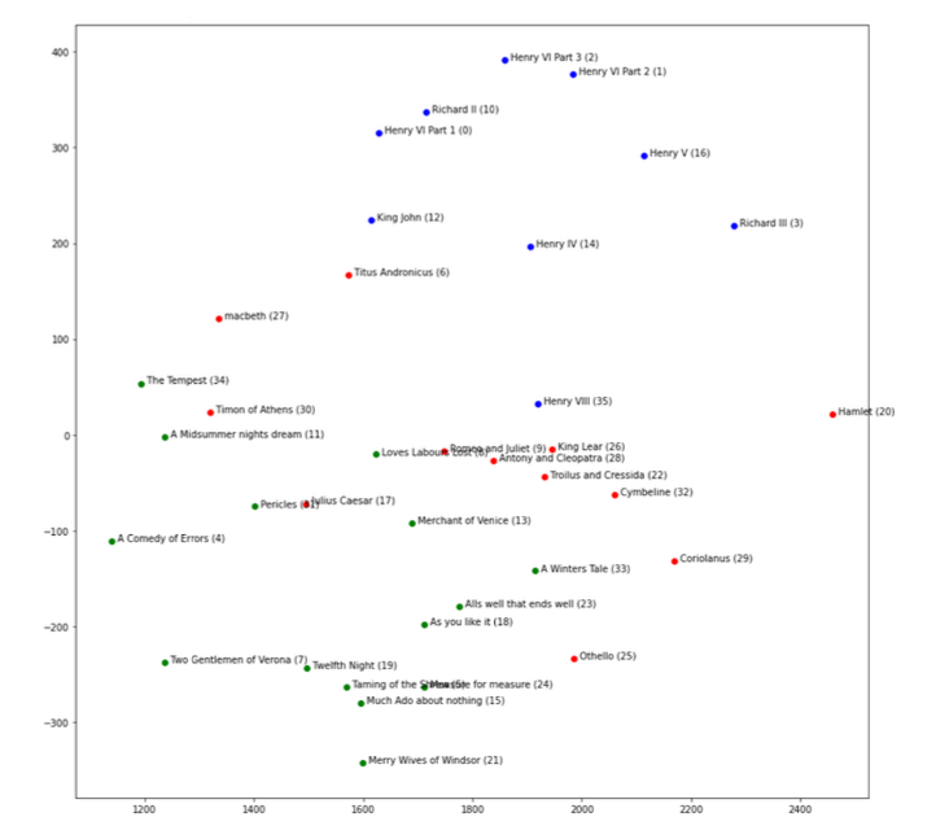

## Why learn SVD if PCA is simpler?

- PCA is SVD (applied to a covariance matrix).

- SVD works on any matrix; PCA works **best** when the matrix is a dataset:  Rows = samples, columns = features.

- SVD gives two sets of eigenvector-like directions (U and V).

- SVD is optimal for low-rank approximation (Eckart–Young).

- Many ML methods (LSA, recommender systems, LoRA, pseudoinverses) depend on SVD, not PCA.